## **Import Libraries**

In [ ]:
!pip3 install torch==1.8.0

     |████████████████████████████████| 735.5MB 21kB/s 
ERROR: torchvision 0.9.1+cu101 has requirement torch==1.8.1, but you'll have torch 1.8.0 which is incompatible.
ERROR: torchtext 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.8.0 which is incompatible.
  Found existing installation: torch 1.8.1+cu101
    Uninstalling torch-1.8.1+cu101:
      Successfully uninstalled torch-1.8.1+cu101


In [ ]:
#!pip install torchtext==0.8.1
!pip install -U fastbook
#!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 31.2MB/s 
     |████████████████████████████████| 204kB 51.0MB/s 
     |████████████████████████████████| 1.2MB 40.5MB/s 
     |████████████████████████████████| 51kB 7.3MB/s 
     |████████████████████████████████| 61kB 9.4MB/s 
     |████████████████████████████████| 51kB 9.1MB/s 
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61
Mounted at /content/gdrive


In [ ]:
from fastbook import *

In [ ]:
torch.cuda.is_available()

True

In [ ]:
# Install the Kaggle API
!pip3 install kaggle

## **Import Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import kaggle.json from Google Drive
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nb2000","key":"29892af90c645cff2bb831ab579b0f17"}'}

In [ ]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [00:30<00:00, 18.0MB/s]
100% 2.29G/2.29G [00:30<00:00, 79.5MB/s]


In [ ]:
#from fastai import *
#from fastai.vision import *
#from fastai.imports import *

In [ ]:
!ls ./drive/MyDrive/kaggle/

In [ ]:
x = '/content/drive/MyDrive/kaggle/train'
path = Path(x)
path.ls()

(#4) [Path('/content/drive/MyDrive/kaggle/train/PNEUMONIA'),Path('/content/drive/MyDrive/kaggle/train/NORMAL'),Path('/content/drive/MyDrive/kaggle/train/models'),Path('/content/drive/MyDrive/kaggle/train/.ipynb_checkpoints')]

## **Load Data**

In [ ]:
np.random.seed(40)
data = ImageDataLoaders.from_folder(path, train = '.', 
                                    valid_pct=0.2,ds_tfms=aug_transforms(),
                                    batch_tfms=Normalize.from_stats(*imagenet_stats), item_tfms=Resize(224),num_workers=0)

## **Visualisations**

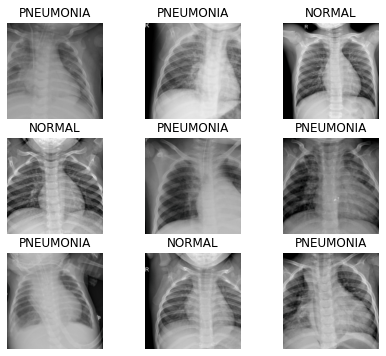

In [ ]:
data.show_batch(nrows=3, figsize=(7,6))

In [ ]:
data.c

2

## **Train Model**

In [ ]:
f1score = F1Score()
learn = cnn_learner(data, models.resnet50, metrics=[accuracy, error_rate, Precision(average='micro'),Recall(average='micro'),f1score])

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


In [ ]:
learn.loss_func

FlattenedLoss of CrossEntropyLoss()

In [ ]:
learn.opt_func

<function fastai.optimizer.Adam>

SuggestedLRs(lr_min=0.010000000149011612, lr_steep=0.0006918309954926372)

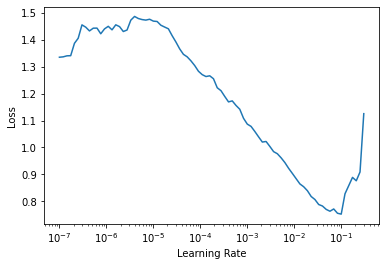

In [ ]:
learn.lr_find(show_plot=True)

In [ ]:
lr1 = 1e-3
lr2 = 1e-1
learn.fit_one_cycle(4,slice(lr1,lr2))  #default bs=64

epoch,train_loss,valid_loss,accuracy,error_rate,precision_score,recall_score,f1_score,time
0,0.461078,4.962298,0.667306,0.332694,0.667306,0.667306,0.708158,06:10
1,0.386285,0.809813,0.881112,0.118888,0.881112,0.881112,0.912181,02:15
2,0.179061,0.105784,0.978907,0.021093,0.978907,0.978907,0.985733,02:14
3,0.075022,0.084699,0.979866,0.020134,0.979866,0.979866,0.986283,02:14


In [ ]:
lr = 1e-1
learn.fit_one_cycle(20,slice(lr))

epoch,train_loss,valid_loss,accuracy,error_rate,precision_score,recall_score,f1_score,time
0,0.024269,0.074322,0.981783,0.018217,0.981783,0.981783,0.987557,02:14
1,0.017455,0.089481,0.984660,0.015340,0.984660,0.984660,0.989570,02:13
2,0.070447,0.475142,0.928092,0.071908,0.928092,0.928092,0.948945,02:14
3,0.630478,2.402568,0.854267,0.145733,0.854267,0.854267,0.890961,02:13
4,0.687421,0.390504,0.976031,0.023969,0.976031,0.976031,0.983713,02:13
5,0.402125,1.781420,0.917546,0.082454,0.917546,0.917546,0.940771,02:13
6,0.216902,0.107314,0.985618,0.014382,0.985618,0.985618,0.990215,02:13
7,0.110695,0.131696,0.976989,0.023011,0.976989,0.976989,0.984556,02:13
8,0.101772,0.692956,0.945350,0.054650,0.945350,0.945350,0.964083,02:14
9,0.193426,1.173992,0.910834,0.089166,0.910834,0.910834,0.942769,02:15


Important thing to notedown :


1.   When TrnLoss = valdloss down along w/ metric ics means good
2.   When trnloss = less but valid loss is more and metric is dcs means overfitting








In [ ]:
learn.unfreeze()
#learn.recorder.plot_loss()
learn.fit_one_cycle(10,slice(1e-4,1e-3))

epoch,train_loss,valid_loss,accuracy,error_rate,precision_score,recall_score,f1_score,time
0,0.027266,0.232280,0.979866,0.020134,0.979866,0.979866,0.986193,02:26
1,0.098097,5.262734,0.835091,0.164909,0.835091,0.835091,0.873900,02:26
2,0.065591,0.085705,0.976989,0.023011,0.976989,0.976989,0.984190,02:26
3,0.041439,0.071355,0.976989,0.023011,0.976989,0.976989,0.984496,02:26
4,0.029078,0.047915,0.983701,0.016299,0.983701,0.983701,0.988983,02:25
5,0.023717,0.068688,0.984660,0.015340,0.984660,0.984660,0.989651,02:26
6,0.014981,0.039351,0.989453,0.010547,0.989453,0.989453,0.992843,02:25
7,0.010551,0.044754,0.989453,0.010547,0.989453,0.989453,0.992853,02:26
8,0.005790,0.044644,0.991371,0.008629,0.991371,0.991371,0.994129,02:25
9,0.003802,0.041172,0.992330,0.007670,0.992330,0.992330,0.994785,02:27


epoch,train_loss,valid_loss,accuracy,error_rate,precision_score,recall_score,f1_score,time
0,0.007325,0.333755,0.983701,0.016299,0.983701,0.983701,0.988852,02:27
1,0.043782,0.651589,0.897411,0.102589,0.897411,0.897411,0.925122,02:26
2,0.030372,0.044547,0.986577,0.013423,0.986577,0.986577,0.990885,02:26
3,0.015124,0.034709,0.991371,0.008629,0.991371,0.991371,0.994144,02:27
4,0.009712,0.038871,0.990412,0.009588,0.990412,0.990412,0.993473,02:26


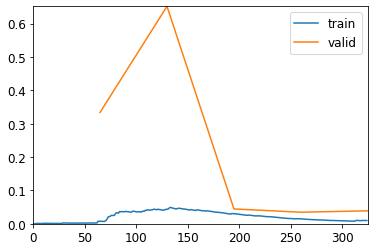

In [ ]:
#learn.recorder.plot()
learn.fit_one_cycle(5,slice(1e-4,1e-3),cbs=[ShowGraphCallback()])

## **Evaluated Metrics**

In [ ]:
  @patch
@delegates(subplots)
def plot_metrics(self: Recorder, nrows=None, ncols=None, figsize=None, **kwargs):
    metrics = np.stack(self.values)
    names = self.metric_names[1:-1]
    n = len(names) - 1
    if nrows is None and ncols is None:
        nrows = int(math.sqrt(n))
        ncols = int(np.ceil(n / nrows))
    elif nrows is None: nrows = int(np.ceil(n / ncols))
    elif ncols is None: ncols = int(np.ceil(n / nrows))
    figsize = figsize or (ncols * 6, nrows * 4)
    fig, axs = subplots(nrows, ncols, figsize=figsize, **kwargs)
    axs = [ax if i < n else ax.set_axis_off() for i, ax in enumerate(axs.flatten())][:n]
    for i, (name, ax) in enumerate(zip(names, [axs[0]] + axs)):
        ax.plot(metrics[:, i], color='#1f77b4' if i == 0 else '#ff7f0e', label='valid' if i > 0 else 'train')
        ax.set_title(name if i > 1 else 'losses')
        ax.legend(loc='best')
    plt.show()

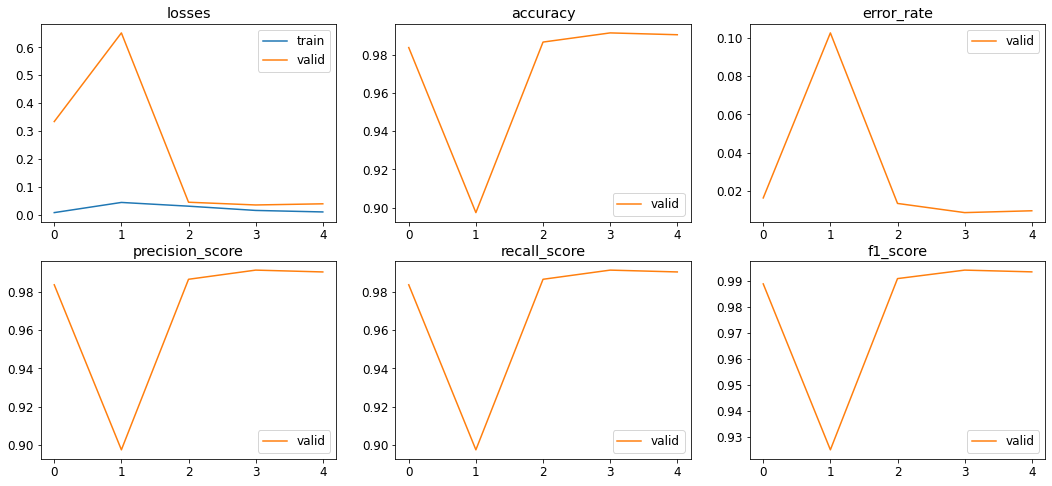

In [ ]:
learn.recorder.plot_metrics()

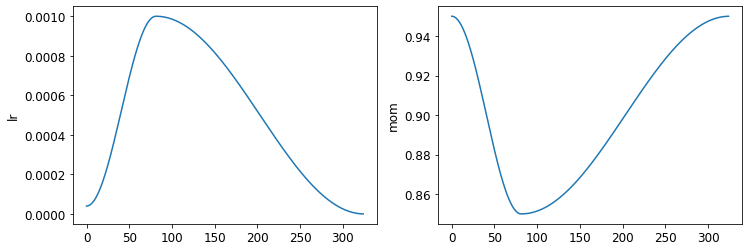

In [ ]:
learn.recorder.plot_sched()

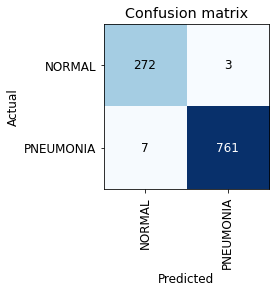

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

## **Predictions**

In [ ]:
img = PILImage.create('../content/drive/MyDrive/kaggle/test/NORMAL/IM-0001-0001.jpeg')
print(learn.predict(img)[0])

NORMAL


In [ ]:
img = PILImage.create('../content/drive/MyDrive/kaggle/test/PNEUMONIA/person1_virus_6.jpeg')
print(learn.predict(img)[0])

PNEUMONIA


In [ ]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

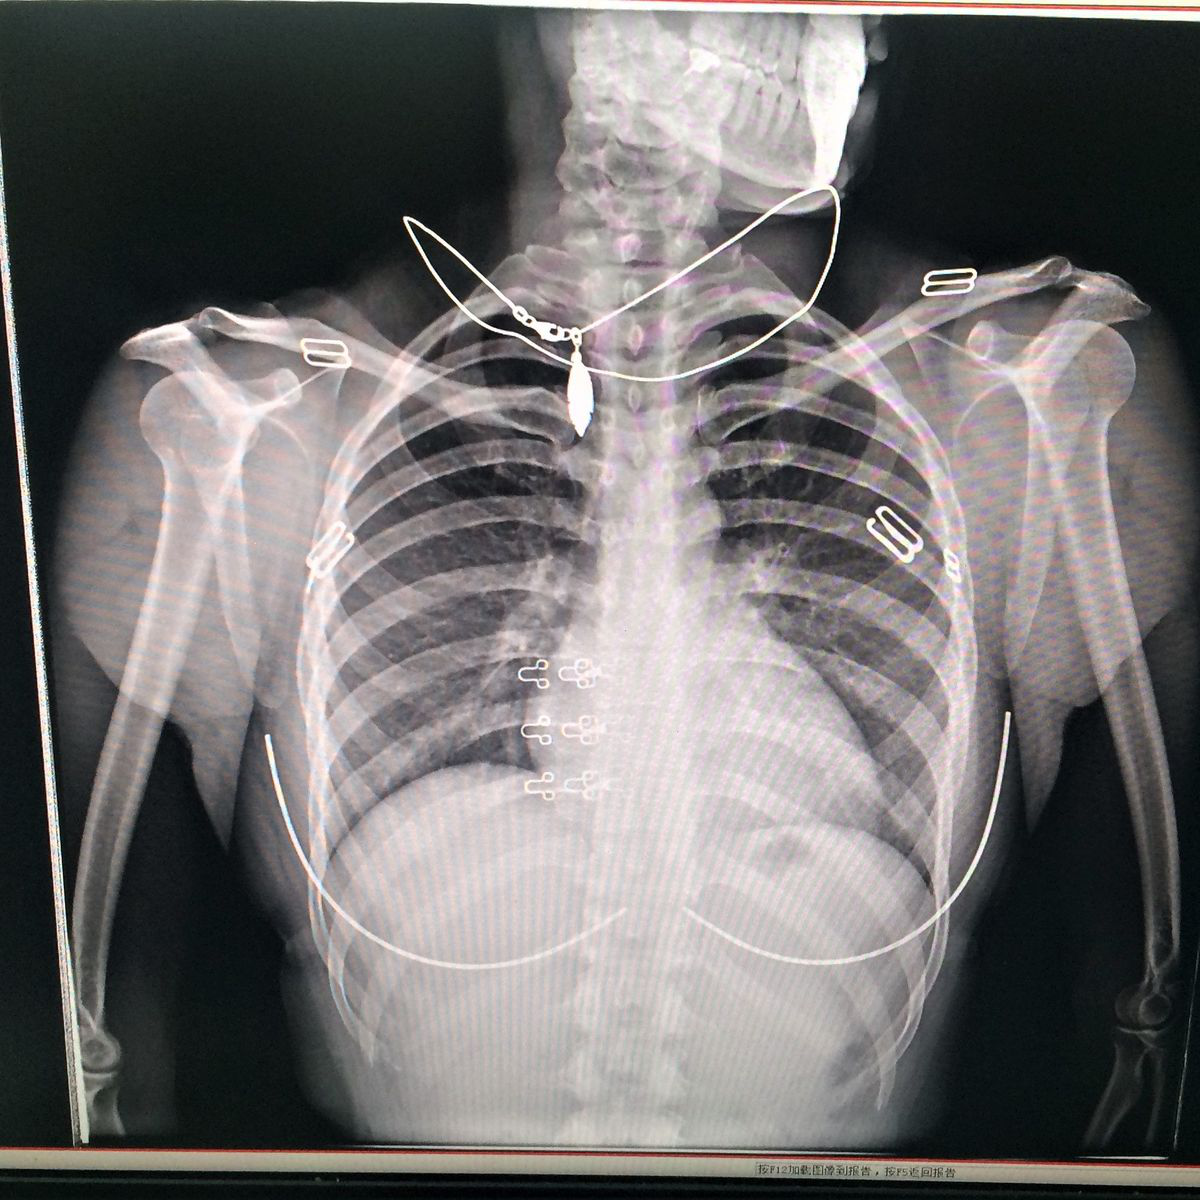

In [ ]:
PILImage.create(uploader.data[0])

In [ ]:
img = PILImage.create(uploader.data[0])
is_p,_,probs = learn.predict(img)
print(f"Is Pneumonic?: {is_p}.")
print(f"Probability of Pneumonia: {probs[1].item():.6f}")

Is Pneumonic?: PNEUMONIA.
Probability of Pneumonia: 0.999915


## **Export the model**

In [ ]:
learn.export('model.pkl')

## **Model Architecture**

In [ ]:
# uncomment below code for printing Architecture 
learn.arch()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

## **Prediction with pkl file**

In [ ]:
learn_inference = load_learner(path/'model.pkl')

In [ ]:
learn_inference.predict("PNEUMONIA(3418).jpg")

('PNEUMONIA', tensor(1), tensor([1.3583e-06, 1.0000e+00]))

In [ ]:
learn_inference.predict("normal x-ray.jpeg")

('NORMAL', tensor(0), tensor([1., 0.]))

In [ ]:
learn_inference.predict("person3_virus_17.jpeg")

('PNEUMONIA', tensor(1), tensor([7.7527e-05, 9.9992e-01]))

In [ ]:
learn_inference.predict("person8_virus_27.jpeg")

('PNEUMONIA', tensor(1), tensor([1.7603e-04, 9.9982e-01]))

In [ ]:
learn_inference.predict("IM-0059-0001.jpeg")

('NORMAL', tensor(0), tensor([9.9926e-01, 7.4047e-04]))

In [ ]:
learn_inference.predict("IM-0050-0001.jpeg")

('NORMAL', tensor(0), tensor([1.0000e+00, 2.1454e-06]))

## **Deployment**

In [ ]:
from fastai.vision.widgets import *

In [ ]:
btn_run = widgets.Button(description='Classify')

In [ ]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(224,224))
    is_p, pred_idx, probs = learn_inference.predict(img)
    label_pred.value = f'Prediction: {is_p}; Probability: {probs[pred_idx]:.04f}'

In [ ]:
btn_run.on_click(on_click_classify)

In [ ]:
btn_upload = widgets.FileUpload()
out_pl = widgets.Output()
label_pred = widgets.Label()

In [ ]:
VBox([widgets.Label('Select an X-ray Image'), btn_upload, btn_run, out_pl, label_pred])